In [2]:
import numpy as np


In [44]:
filename = './USA-road-d.NY.co/USA-road-d.NY.co' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
x_list = []
y_list = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        v, id, x_loc, y_loc = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(id))  # 添加新读取的数据
        item.append(int(x_loc))
        item.append(int(y_loc))
        Efield.append(item)
        x_list.append(int(x_loc))
        y_list.append(int(y_loc))
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item) """
city_show_num = 264346
x_list = np.array(x_list)[0:city_show_num]
y_list = np.array(y_list)[0:city_show_num]

city_co = np.array(Efield)
print(city_co)
print(x_list)

[[        1 -73530767  41085396]
 [        2 -73530538  41086098]
 [        3 -73519366  41048796]
 ...
 [   264344 -73820681  40994683]
 [   264345 -73714376  41004205]
 [   264346 -73917690  41291980]]
[-73530767 -73530538 -73519366 ... -73820681 -73714376 -73917690]


## 读取图连通关系

In [7]:
filename = './USA-road-d.NY.gr/USA-road-d.NY.gr' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        a, v_i, v_j, dis_ij = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(v_i))  # 添加新读取的数据
        item.append(int(v_j))
        item.append(int(dis_ij))
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """

dis_table = np.array(Efield)
D_max = np.max(dis_table[:,2])
print(D_max)
print(dis_table)

36946
[[     1      2    803]
 [     2      1    803]
 [     3      4    158]
 ...
 [263813 263466    106]
 [261228 259707    389]
 [259707 261228    389]]


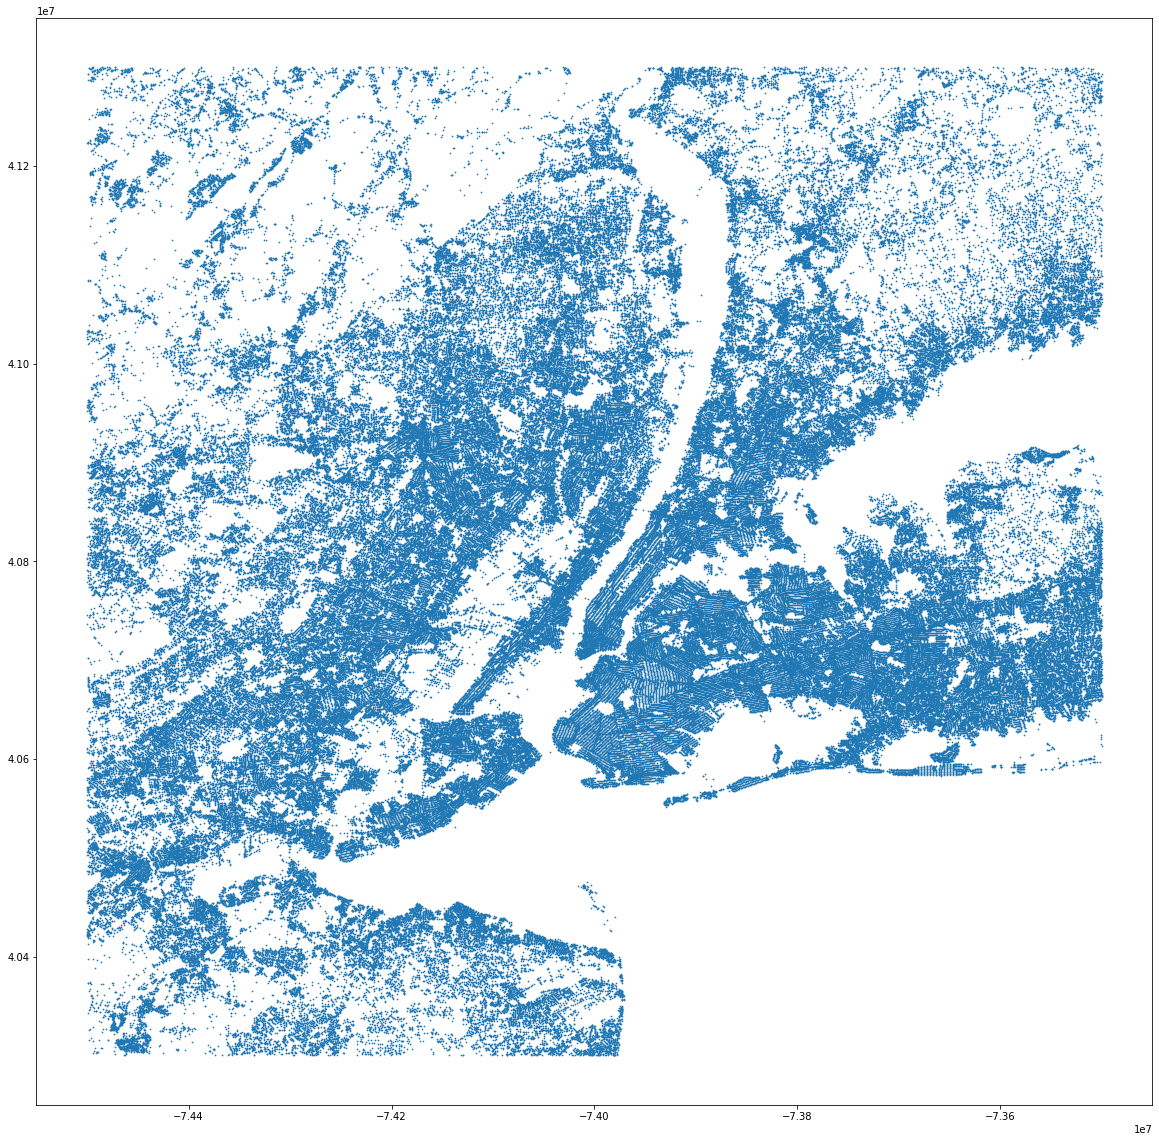

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))

""" for edge in dis_table[:1000]:
    x_1 = city_co[edge[0],1]
    x_2 = city_co[edge[1],1]
    X = [x_1, x_2]
    y_1 = city_co[edge[0],2]
    y_2 = city_co[edge[1],2]
    Y = [y_1, y_2]
    plt.plot(X, Y, color = 'r', linewidth = 0.1) """
# plt.savefig("map.png")
plt.scatter(x_list,y_list,s=0.5)
plt.show()

## 多因素等值关系转化

### 1.费用距离等值

In [9]:
filename = './multi_map/fee_map.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        v_i, v_j, fee_ij = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(v_i))  # 添加新读取的数据
        item.append(int(v_j))
        item.append(int(fee_ij))
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """

f_list = np.array(Efield)
f_max = np.max(f_list[:,2])
print(f_max)
print(f_list)

999
[[     1      2    643]
 [     2      1    522]
 [     3      4    688]
 ...
 [263813 263466    307]
 [261228 259707    217]
 [259707 261228    655]]


In [10]:
F2D_list = []
for item in f_list:
    temp_item = []
    temp_item.append(item[0])
    temp_item.append(item[1])
    temp_item.append(int(item[2] / (10 * f_max) * D_max))
    F2D_list.append(temp_item)
F2D_list = np.array(F2D_list)
print(F2D_list)

[[     1      2   2378]
 [     2      1   1930]
 [     3      4   2544]
 ...
 [263813 263466   1135]
 [261228 259707    802]
 [259707 261228   2422]]


### 2.限高距离等值

In [11]:
filename = './multi_map/H_map.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        v_i, v_j, H_ij = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(v_i))  # 添加新读取的数据
        item.append(int(v_j))
        item.append(int(H_ij))
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """

H_list = np.array(Efield)
print(H_list)

[[     1      2      1]
 [     2      1      1]
 [     3      4      1]
 ...
 [263813 263466      1]
 [261228 259707      1]
 [259707 261228      1]]


In [12]:
H2D_list = []
for item in f_list:
    temp_item = []
    temp_item.append(item[0])
    temp_item.append(item[1])
    if item[2] == 0:
        temp_item.append(np.inf)
    else:
        temp_item.append(0)
    #temp_item.append(int(item[2] / (10 * f_max) * D_max))
    H2D_list.append(temp_item)
H2D_list = np.array(H2D_list)
print(H2D_list)

[[     1      2      0]
 [     2      1      0]
 [     3      4      0]
 ...
 [263813 263466      0]
 [261228 259707      0]
 [259707 261228      0]]


### 3.限速距离等值

In [13]:
filename = './multi_map/S_map.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        v_i, v_j, S_ij = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(v_i))  # 添加新读取的数据
        item.append(int(v_j))
        item.append(int(S_ij))
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """

S_list = np.array(Efield)
S_max = np.max(S_list[:,2])
print(S_max)
print(S_list)

149
[[     1      2    126]
 [     2      1    112]
 [     3      4     65]
 ...
 [263813 263466     23]
 [261228 259707     10]
 [259707 261228     70]]


In [14]:
S2D_list = []
for item in f_list:
    temp_item = []
    temp_item.append(item[0])
    temp_item.append(item[1])
    temp_item.append(int(item[2] / (100 * S_max) * D_max))
    S2D_list.append(temp_item)
S2D_list = np.array(S2D_list)
print(S2D_list)

[[     1      2   1594]
 [     2      1   1294]
 [     3      4   1705]
 ...
 [263813 263466    761]
 [261228 259707    538]
 [259707 261228   1624]]


### 4.拥堵距离等值

In [15]:
filename = './multi_map/J_map.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        v_i, v_j, J_ij = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(v_i))  # 添加新读取的数据
        item.append(int(v_j))
        item.append(int(J_ij))
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """

J_list = np.array(Efield)
J_max = np.max(J_list[:,2])
print(J_max)
print(J_list)

5
[[     1      2      4]
 [     2      1      1]
 [     3      4      5]
 ...
 [263813 263466      3]
 [261228 259707      5]
 [259707 261228      2]]


In [16]:
J2D_list = []
for item in J_list:
    temp_item = []
    temp_item.append(item[0])
    temp_item.append(item[1])
    temp_item.append(int(item[2] / (10 * J_max) * D_max))
    J2D_list.append(temp_item)
J2D_list = np.array(J2D_list)
print(J2D_list)

[[     1      2   2955]
 [     2      1    738]
 [     3      4   3694]
 ...
 [263813 263466   2216]
 [261228 259707   3694]
 [259707 261228   1477]]


### 5.天气距离等值

In [17]:
filename = './multi_map/W_map.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
        v_i, v_j, W_ij = [i for i in lines.split()] # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        item.append(int(v_i))  # 添加新读取的数据
        item.append(int(v_j))
        item.append(int(W_ij))
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """

W_list = np.array(Efield)
print(W_list)

[[     1      2      1]
 [     2      1      2]
 [     3      4      1]
 ...
 [263813 263466      2]
 [261228 259707      3]
 [259707 261228      2]]


In [18]:
W2D_list = []
for item in W_list:
    temp_item = []
    temp_item.append(item[0])
    temp_item.append(item[1])
    if item[2] == 1 or item[2] == 2:
        temp_item.append(0)
    else:
        temp_item.append(D_max)
    # temp_item.append(int(item[2] / (10 * J_max) * D_max))
    W2D_list.append(temp_item)
W2D_list = np.array(W2D_list)
print(W2D_list)

[[     1      2      0]
 [     2      1      0]
 [     3      4      0]
 ...
 [263813 263466      0]
 [261228 259707  36946]
 [259707 261228      0]]


### 6.时长距离等值

In [19]:
T_list = []
for i in range(len(W_list)):
    temp_item = []
    temp_item.append(W_list[i,0])
    temp_item.append(W_list[i,1])
    T_ij = 0
    if W_list[i,2] == 1 or W_list[i,2] == 2:
        T_ij = int(dis_table[i,2] / (J_list[i,2] * S_list[i,2]) * 3.6) # km/h与m/s的换算
    else:
        T_ij = int(2 * dis_table[i,2] / (J_list[i,2] * S_list[i,2]) * 3.6)
    temp_item.append(T_ij)
    T_list.append(temp_item)
T_list = np.array(T_list)
T_max = np.max(T_list[:,2])
print(T_max)
print(T_list)

8977
[[     1      2      5]
 [     2      1     25]
 [     3      4      1]
 ...
 [263813 263466      5]
 [261228 259707     56]
 [259707 261228     10]]


In [20]:
T2D_list = []
for item in T_list:
    temp_item = []
    temp_item.append(item[0])
    temp_item.append(item[1])
    temp_item.append(int(item[2] / T_max * D_max * 10))
    T2D_list.append(temp_item)
T2D_list = np.array(T2D_list)
print(T2D_list)

[[     1      2    205]
 [     2      1   1028]
 [     3      4     41]
 ...
 [263813 263466    205]
 [261228 259707   2304]
 [259707 261228    411]]


## 多因素加权统一为单因素

In [45]:
# -*- coding: utf-8 -*-
import random
import copy
import time
import numpy as np
import sys
import math
import tkinter #//GUI模块
import threading
import pandas as pd
from functools import reduce
from adjacency_list import Vertex,Graph

# 参数
'''
ALPHA:信息启发因子，值越大，则蚂蚁选择之前走过的路径可能性就越大
      ，值越小，则蚁群搜索范围就会减少，容易陷入局部最优
BETA:Beta值越大，蚁群越就容易选择局部较短路径，这时算法收敛速度会
     加快，但是随机性不高，容易得到局部的相对最优
'''
(ALPHA, BETA, RHO, Q) = (1.0,2.0,0.3,1000)
# 城市数，蚁群
(city_num, ant_num) = (264346,1000)
distance_adja_graph = Graph()
F2D_adja_graph = Graph()
H2D_adja_graph = Graph()
S2D_adja_graph = Graph()
J2D_adja_graph = Graph()
W2D_adja_graph = Graph()
T2D_adja_graph = Graph()
total_cost_adja_graph = Graph()

pheromone_adja_graph = Graph()
for i in range(city_num):
    distance_adja_graph.addVertex(i)
    F2D_adja_graph.addVertex(i)
    H2D_adja_graph.addVertex(i)
    S2D_adja_graph.addVertex(i)
    J2D_adja_graph.addVertex(i)
    W2D_adja_graph.addVertex(i)
    T2D_adja_graph.addVertex(i)
    total_cost_adja_graph.addVertex(i)
    
    pheromone_adja_graph.addVertex(i)



In [65]:
#----------- 蚂蚁 -----------
class Ant(object):

    # 初始化
    def __init__(self,ID,target,start):

        self.ID = ID                 # ID
        self.target = target
        self.start = start
        self.__clean_data()          # 随机初始化出生点

    # 初始数据
    def __clean_data(self):

        self.path = []               # 当前蚂蚁的路径
        self.total_cost = 0         # 加权总代价           
        self.total_distance = 0.0    # 当前路径的总距离
        self.total_F2D = 0
        self.total_H2D = 0
        self.total_S2D = 0
        self.total_J2D = 0
        self.total_W2D = 0
        self.total_T2D = 0
        self.total_cost = 0

        self.move_count = 0          # 移动次数
        self.current_city = -1       # 当前停留的城市
        # self.open_table_city = [True for i in range(city_num)] # 探索城市的状态,1代表可访问，0代表不可访问
        self.open_table_city = np.ones(city_num)

        #city_index = random.randint(0,city_num-1) # 随机初始出生点
        city_index = self.start
        self.current_city = city_index
        self.current_city_node = distance_adja_graph.vertList[self.current_city]
        #print('city:',self.current_city_node.getConnections())
        self.current_pheromone_node = pheromone_adja_graph.vertList[self.current_city]
        #print('pheromone:',self.current_pheromone_node.getConnections())
        self.path.append(city_index)
        self.open_table_city[city_index] = 0
        self.move_count = 1

    # 选择下一个城市
    def __choice_next_city(self):

        next_city = -1
        select_citys_prob = {}
        # select_citys_prob = [0.0 for i in range(city_num)]  #存储去下个城市的概率
        total_prob = 0.0
        #print('cityyyyyyy:',self.current_city_node.getConnections())
        for i in self.current_city_node.getConnections():
            if self.open_table_city[i.getId()]:
                try :
                    weight = int((abs(city_co[i.getId(),1] - city_co[self.target, 1]) + abs(city_co[i.getId(),2] - city_co[self.target, 2])) / 10)
                    #weight = self.current_city_node.getweight(distance_adja_graph.vertList[i.getId()])
                    pheromone = self.current_pheromone_node.getweight(pheromone_adja_graph.vertList[i.getId()])
                    
                    select_citys_prob[i.getId()] = pow(pheromone, ALPHA) * pow(1.0/(weight+1), BETA)
                    # 在城市的选择概率上，如果只与信息素有关，是否就一定程度上相当是于随机选择入手，然后会初始生成部分不太优的路径，然后根据评价指标评价后，得到不同的信息素分布。
                    # select_citys_prob[i.getId()] = pow(pheromone, ALPHA)
                    total_prob += select_citys_prob[i.getId()]
                except ZeroDivisionError as e:
                    print ('Ant ID: {ID}, current city: {current}, target city: {target}'.format(ID = self.ID, current = self.current_city, target = i.getId()))
                    sys.exit(1)
        # 获取去下一个城市的概率
        """ for i in range(city_num):
            if self.open_table_city[i]:
                try :
                    # 计算概率：与信息素浓度成正比，与距离成反比
                    if distance_graph[self.current_city][i] < np.inf:
                        select_citys_prob[i] = pow(pheromone_graph[self.current_city][i], ALPHA) * pow((1.0/distance_graph[self.current_city][i]), BETA)
                        total_prob += select_citys_prob[i]
                    else:
                        select_citys_prob[i] = 0

                except ZeroDivisionError as e:
                    print ('Ant ID: {ID}, current city: {current}, target city: {target}'.format(ID = self.ID, current = self.current_city, target = i))
                    sys.exit(1) """

        # 轮盘选择城市
        if total_prob > 0.0:
            # 产生一个随机概率,0.0-total_prob
            temp_prob = random.uniform(0.0, total_prob)
            for i in self.current_city_node.getConnections():
                ID = i.getId()
                if self.open_table_city[ID] and select_citys_prob[ID] != 0:
                    # 轮次相减
                    temp_prob -= select_citys_prob[ID]
                    if temp_prob <= 0.0:
                        next_city = ID
                        break


        """ if (next_city == -1):
            next_city = random.randint(0, city_num - 1)
            while ((self.open_table_city[next_city]) == False):  # if==False,说明已经遍历过了
                next_city = random.randint(0, city_num - 1)  """

        # 返回下一个城市序号
        return next_city

    """ # 计算路径总距离
    def __cal_total_distance(self):

        temp_distance = 0.0

        for i in range(1, len(self.path)):
            start, end = self.path[i-1], self.path[i]
            temp_distance += distance_graph[start][end]

        # 回路
        #end = self.path[0]
        #temp_distance += distance_graph[start][end]
        self.total_distance = temp_distance """


    # 移动操作
    def __move(self, next_city):

        self.path.append(next_city)
        self.open_table_city[next_city] = 0
        # 其实多因素路径规划后，也就只有总时长、总费用、总里程比较有用
        
        self.total_distance += self.current_city_node.getweight(distance_adja_graph.vertList[next_city])
        self.total_F2D += F2D_adja_graph.vertList[self.current_city].getweight(F2D_adja_graph.vertList[next_city])
        self.total_T2D += T2D_adja_graph.vertList[self.current_city].getweight(T2D_adja_graph.vertList[next_city])
        self.total_cost += total_cost_adja_graph.vertList[self.current_city].getweight(total_cost_adja_graph.vertList[next_city])


        self.current_city = next_city
        self.current_city_node = distance_adja_graph.vertList[self.current_city]
        self.current_pheromone_node = pheromone_adja_graph.vertList[self.current_city]
        self.move_count += 1

    # 搜索路径
    def search_path(self):

        # 初始化数据
        self.__clean_data()

        # 搜素路径，遍历完所有城市为止
        # while self.move_count < 1000:
        while self.move_count < city_num:
            # 移动到下一个城市
            next_city =  self.__choice_next_city()
            if next_city == -1:
                break
            self.__move(next_city)
            #print("move!")
            if next_city == self.target:
                break

        # 计算路径总长度
        # self.__cal_total_distance()



def update_pheromone_gragh(ants,target):

    # 获取每只蚂蚁在其路径上留下的信息素
    for ant in ants:
        #如果这条路无法到达，则不应该更新信息素
        if ant.path[-1] != target:
            continue
        for i in range(1,len(ant.path)):
            start, end = ant.path[i-1], ant.path[i]
            # 在路径上的每两个相邻城市间留下信息素，与路径总距离反比
            #temp_pheromone[start][end] += Q / ant.total_distance
            temp_vertex = pheromone_adja_graph.vertList[start]
            temp_pheromone =temp_vertex.getweight(pheromone_adja_graph.vertList[end]) * (1-RHO)
            # 更新所有城市之间的信息素，旧信息素衰减加上新迭代信息素
            temp_pheromone += Q / ant.total_cost
            pheromone_adja_graph.addEdge(start,end,temp_pheromone)

In [182]:
def initial_map(city_num, W):
        # 初始化邻接表
    distance_adja_graph.clear()
    pheromone_adja_graph.clear()
    initial_pheromone = 1
    for index in range(len(dis_table)):
        if dis_table[index,0] <= city_num and dis_table[index, 1] <= city_num:
            
            distance_adja_graph.addEdge(dis_table[index,0],dis_table[index, 1],dis_table[index, 2])
            F2D_adja_graph.addEdge(F2D_list[index,0],F2D_list[index, 1],F2D_list[index, 2])
            H2D_adja_graph.addEdge(H2D_list[index,0],H2D_list[index, 1],H2D_list[index, 2])
            S2D_adja_graph.addEdge(S2D_list[index,0],S2D_list[index, 1],S2D_list[index, 2])
            J2D_adja_graph.addEdge(J2D_list[index,0],J2D_list[index, 1],J2D_list[index, 2])
            W2D_adja_graph.addEdge(W2D_list[index,0],W2D_list[index, 1],W2D_list[index, 2])
            T2D_adja_graph.addEdge(T2D_list[index,0],T2D_list[index, 1],T2D_list[index, 2])
            #加权统一
            total_cost_weight = np.dot(np.array([dis_table[index, 2], F2D_list[index, 2], S2D_list[index, 2], J2D_list[index, 2], W2D_list[index, 2], T2D_list[index, 2], H2D_list[index, 2]]), W)
            #print(total_cost_weight)
            total_cost_adja_graph.addEdge(T2D_list[index,0], T2D_list[index, 1], total_cost_weight)
            
            pheromone_adja_graph.addEdge(dis_table[index,0],dis_table[index, 1],initial_pheromone) 
    """ for item in dis_table:
        if item[0] <= city_num and item[1] <= city_num:
            
            distance_adja_graph.addEdge(item[0],item[1],item[2])
            pheromone_adja_graph.addEdge(item[0],item[1],initial_pheromone) """

def initial_ants(start, target):
    global ants
    ants = [Ant(ID,target,start) for ID in range(ant_num)]  # 初始蚁群

def search_path(start,target):
    
    
    best_ant = Ant(-1,target,start)                          # 初始最优解
    #best_ant.total_distance = np.inf           # 初始最好的蚂蚁
    best_cost = np.inf
    best_D = np.inf
    best_F2D = np.inf
    best_T2D = np.inf
    iter = 1

    while True:
        # 遍历每一只蚂蚁
        tic = time.time()
        count = 0
        for ant in ants:
            # 搜索一条路径
            ant.search_path()
            # 与当前最优蚂蚁比较
            #print(ant.path)
            #print(ant.total_distance)
            if ant.total_cost < best_cost and ant.path[-1] == target:
                # 更新最优解
                #best_ant = copy.deepcopy(ant)
                best_path = ant.path
                best_cost = ant.total_cost
                best_D = ant.total_distance
                best_F2D = ant.total_F2D
                best_T2D = ant.total_T2D
                print('found a path!')

        # 更新信息素
        update_pheromone_gragh(ants,target)
        if best_cost < np.inf:
            toc = time.time()
            gap = toc-tic
            path_str = '%d' % best_path[0]
            # 给定策略然后进行选择
            for i in range(len(best_path) - 1):
                """ if strategy_graph[best_path[i]][best_path[i+1]] == 1:
                    path_str = path_str + '--freeway--'
                elif strategy_graph[best_path[i]][best_path[i+1]] == 2:
                    path_str = path_str + '--road--' """
                path_str = path_str + '------' + '%d' % best_path[i+1]
            # 给定策略的概率，按概率进行选择?这样似乎是不太合理的。因为只有策略确定了之后，才有相应的评价体系，先后顺序不能乱
            """ for i in range(len(best_path) - 1):
                if prob_graph[best_path[i]][best_path[i+1]] >= 0:
                    # 二项分布随机数
                    the_choice = np.random.binomial(1,prob_graph[best_path[i]][best_path[i+1]],size = 1)
                    print(prob_graph[best_path[i]][best_path[i+1]])
                    if the_choice == 1:
                        path_str = path_str + '--freeway--'
                    elif the_choice == 0:
                        path_str = path_str + '--road--'
                    path_str = path_str + '%d' % best_path[i+1] """
            print (u"迭代次数：",iter,u"最佳路径总代价：",int(best_cost),u"最佳路径总里程：",int(best_D),u"最佳路径总费用：",int(best_F2D),u"最佳路径总时长：",int(best_T2D),"路径为：",path_str,"搜索时长：",gap)
        else:
            print(u"迭代次数：",iter,u"无法到达！")
        iter += 1
        if iter == 10:
            break


显示起终点在地图中的相对位置

In [129]:
# 设置起点和终点
start = 196
target = 245

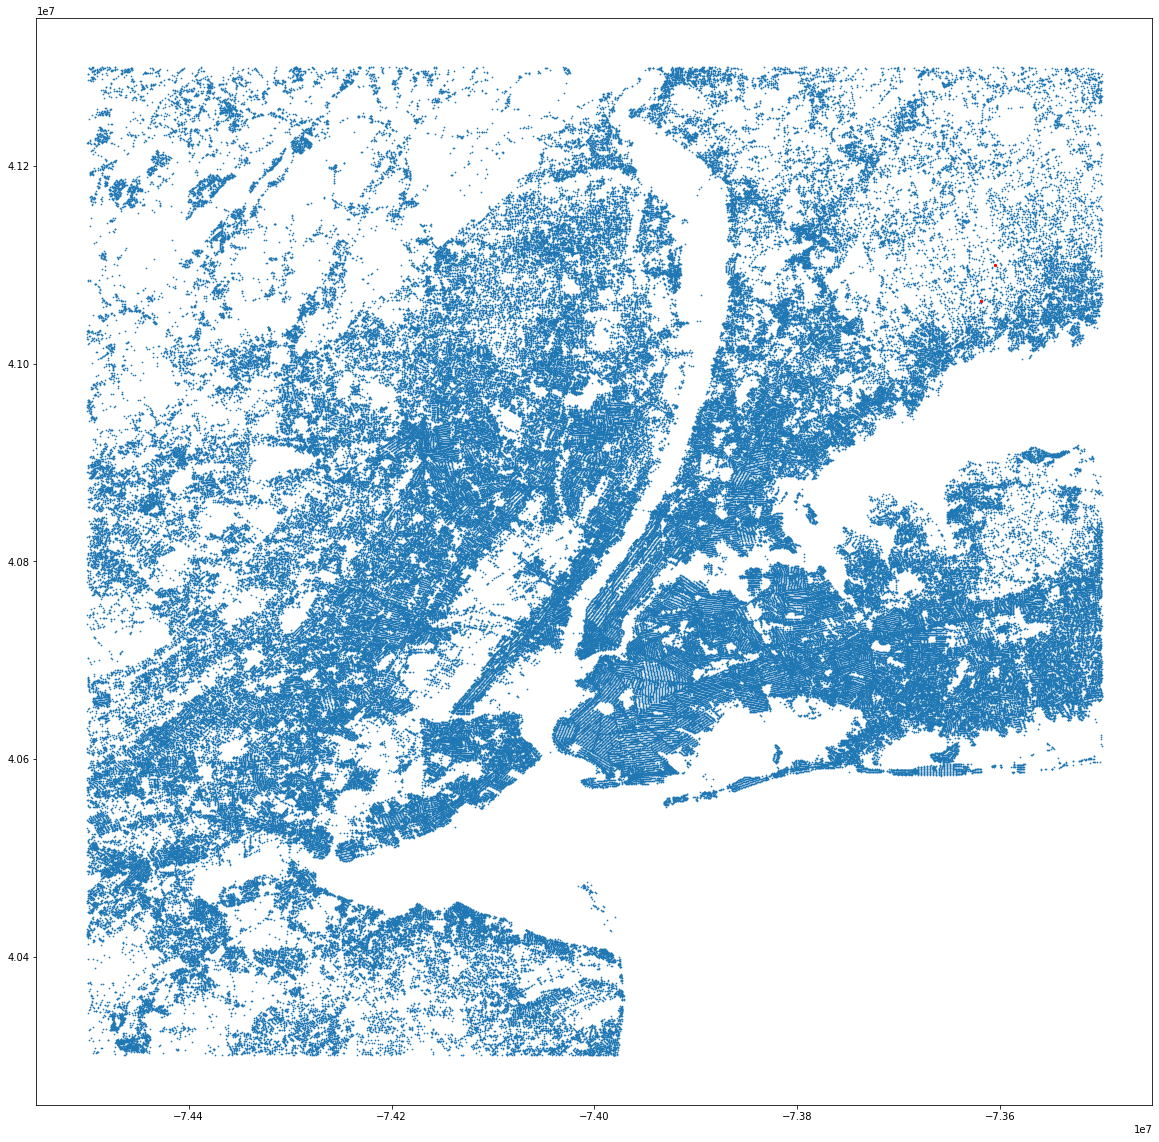

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plt.scatter(x_list,y_list,s=0.5)
""" for edge in dis_table[:1000]:
    x_1 = city_co[edge[0],1]
    x_2 = city_co[edge[1],1]
    X = [x_1, x_2]
    y_1 = city_co[edge[0],2]
    y_2 = city_co[edge[1],2]
    Y = [y_1, y_2]
    plt.plot(X, Y, color = 'r', linewidth = 0.1) """
# plt.savefig("map.png")
x_start = city_co[start,1]
x_target = city_co[target,1]
X = [x_start, x_target]
y_start = city_co[start,2]
y_target = city_co[target,2]
Y = [y_start, y_target]
plt.scatter(X,Y,c = 'r', s=5)
plt.show()

显示某一个节点有多少个邻居节点

In [44]:
for item in dis_table:
    #if item[0] <= 400 and item[1] <= 400:
    distance_adja_graph.addEdge(item[0],item[1],item[2])

In [100]:
node_nbr = list(distance_adja_graph.vertList[22].connectedTo)
for i in range(len(node_nbr)):
    print(node_nbr[i])

20connectedTo[21, 22, 4321]


开始测试搜索

In [96]:
# 设置起点和终点
start = 1
target = 6

In [128]:
W = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1])
cost_type = 0
# cost_type = 0,1,2,3,4,5 分别对应里程优先，费用优先，限速优先，拥堵优先，天气优先，时间优先
W[cost_type] = 0.5
initial_map(city_num, W.transpose())

In [130]:
initial_ants(start,target)

In [134]:
search_path(start,target)

迭代次数： 1 无法到达！
迭代次数： 2 无法到达！
迭代次数： 3 无法到达！
迭代次数： 4 无法到达！
迭代次数： 5 无法到达！
迭代次数： 6 无法到达！
迭代次数： 7 无法到达！
迭代次数： 8 无法到达！
迭代次数： 9 无法到达！
迭代次数： 10 无法到达！
found a path!
迭代次数： 11 最佳路径总代价： 101765 最佳路径总里程： 69939 最佳路径总费用： 39424 最佳路径总时长： 223058 路径为： 196------202------181------182------184------215------216------217------96------98------221------232------222------237------14------251------252------1549------246------245 搜索时长： 0.6877646446228027
迭代次数： 12 最佳路径总代价： 101765 最佳路径总里程： 69939 最佳路径总费用： 39424 最佳路径总时长： 223058 路径为： 196------202------181------182------184------215------216------217------96------98------221------232------222------237------14------251------252------1549------246------245 搜索时长： 0.6779029369354248
found a path!
迭代次数： 13 最佳路径总代价： 85187 最佳路径总里程： 53060 最佳路径总费用： 42251 最佳路径总时长： 215276 路径为： 196------202------181------182------184------215------216------217------96------98------221------231------261------101------100------233------234------235------236------239------240------245 搜索时长： 0.681708812

KeyboardInterrupt: 

## 分层预处理下的蚁群算法

In [79]:
# 读取子图分割信息
filename = './subgraph_list.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
         # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        for i in lines.split():
            item.append(int(i)) 
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """
subgraph_list = np.array(Efield)
print(subgraph_list)

[[     0      5]
 [     1      5]
 [     2      5]
 ...
 [264343 252177]
 [264344 257475]
 [264345 236227]]


In [81]:
# 读取高一级图，枢纽点节点
filename = './pivot_list.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
         # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        pivot_point, b = lines.split()
        Efield.append(int(pivot_point))
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """
pivot_list = np.array(Efield)
print(pivot_list)

[140961 141750 187961 ... 106977 250593 263850]


In [82]:
# 读取高一级图，枢纽点之间的连边，以及最短路径
filename = './pivot_edge_list.txt' # txt文件和当前脚本在同一目录下，所以不用写具体路径
Efield = []
with open(filename, 'r') as file_to_read:
    count = 0
    while True:
        item = []
        lines = file_to_read.readline() # 整行读取数据
        if not lines:
            break
         # 将整行数据分割处理，如果分割符是空格，括号里就不用传入参数，如果是逗号， 则传入‘，'字符。
        for i in lines.split():
            item.append(int(i)) 
        Efield.append(item)
        count += 1
"""         if count % 1000 == 0:
            print("count:",count)
            print("item:",item)  """
pivot_edge_list = np.array(Efield)
print(pivot_edge_list)

[list([140961, 140956, 5455, 140961, 140960, 140959, 140955, 140957, 140956])
 list([140961, 141028, 2701, 140961, 141026, 141028])
 list([140961, 140986, 3244, 140961, 140980, 140986]) ...
 list([263850, 255873, 96625, 263850, 263849, 260454, 260438, 260535, 260520, 260516, 260518, 260496, 260497, 260498, 260499, 260525, 260547, 260550, 257172, 257174, 257191, 257189, 257190, 256721, 256722, 256723, 256720, 256740, 256731, 256730, 256732, 256733, 256729, 256700, 256701, 256802, 256798, 256781, 256780, 256773, 256483, 256479, 256476, 256436, 256435, 256431, 256261, 256258, 256247, 256241, 256215, 256213, 255665, 255675, 255676, 255672, 255671, 255668, 255667, 255677, 255657, 255661, 255659, 255911, 255912, 255914, 255913, 255916, 255865, 255918, 255868, 255870, 255869, 255873])
 list([263850, 247409, 107706, 263850, 263849, 260454, 260438, 260535, 260520, 260516, 260518, 260496, 260497, 260489, 260485, 260488, 260291, 260307, 260304, 260294, 260270, 260253, 260292, 263787, 260246, 2602

In [88]:
# 分层下的新图
# 分层下进行的新的蚁群算法，其实本质上就是换了一下图
(pivot_city_num, ant_num) = (len(pivot_list),1000)
pivot_distance_adja_graph = Graph()
pivot_pheromone_adja_graph = Graph()
for i in pivot_list:
    pivot_distance_adja_graph.addVertex(i)
    pivot_pheromone_adja_graph.addVertex(i)

In [117]:
#----------- 蚂蚁 -----------
class Ant_pivot(object):

    # 初始化
    def __init__(self,ID,target,start):

        self.ID = ID                 # ID
        self.target = target
        self.start = start
        self.__clean_data()          # 随机初始化出生点

    # 初始数据
    def __clean_data(self):

        self.path = []               # 当前蚂蚁的路径
        self.total_distance = 0.0    # 当前路径的总距离

        self.move_count = 0          # 移动次数
        self.current_city = -1       # 当前停留的城市
        # self.open_table_city = [True for i in range(city_num)] # 探索城市的状态,1代表可访问，0代表不可访问
        self.open_table_city = {}
        for city in pivot_list:
            self.open_table_city[city] = 1

        #city_index = random.randint(0,city_num-1) # 随机初始出生点
        city_index = self.start
        self.current_city = city_index
        self.current_city_node = pivot_distance_adja_graph.vertList[self.current_city]
        #print('city:',self.current_city_node.getConnections())
        self.current_pheromone_node = pivot_pheromone_adja_graph.vertList[self.current_city]
        #print('pheromone:',self.current_pheromone_node.getConnections())
        self.path.append(city_index)
        self.open_table_city[city_index] = 0
        self.move_count = 1

    # 选择下一个城市
    def __choice_next_city(self):

        next_city = -1
        select_citys_prob = {}
        # select_citys_prob = [0.0 for i in range(city_num)]  #存储去下个城市的概率
        total_prob = 0.0
        #print('cityyyyyyy:',self.current_city_node.getConnections())
        for i in self.current_city_node.getConnections():
            if self.open_table_city[i.getId()]:
                try :
                    weight = int((abs(city_co[i.getId(),1] - city_co[self.target, 1]) + abs(city_co[i.getId(),2] - city_co[self.target, 2])) / 10)
                    #weight = self.current_city_node.getweight(distance_adja_graph.vertList[i.getId()])
                    pheromone = self.current_pheromone_node.getweight(pivot_pheromone_adja_graph.vertList[i.getId()])
                    
                    select_citys_prob[i.getId()] = pow(pheromone, ALPHA) * pow(1.0/(weight+1), BETA)
                    # 在城市的选择概率上，如果只与信息素有关，是否就一定程度上相当是于随机选择入手，然后会初始生成部分不太优的路径，然后根据评价指标评价后，得到不同的信息素分布。
                    # select_citys_prob[i.getId()] = pow(pheromone, ALPHA)
                    total_prob += select_citys_prob[i.getId()]
                except ZeroDivisionError as e:
                    print ('Ant ID: {ID}, current city: {current}, target city: {target}'.format(ID = self.ID, current = self.current_city, target = i.getId()))
                    sys.exit(1)
        # 获取去下一个城市的概率
        """ for i in range(city_num):
            if self.open_table_city[i]:
                try :
                    # 计算概率：与信息素浓度成正比，与距离成反比
                    if distance_graph[self.current_city][i] < np.inf:
                        select_citys_prob[i] = pow(pheromone_graph[self.current_city][i], ALPHA) * pow((1.0/distance_graph[self.current_city][i]), BETA)
                        total_prob += select_citys_prob[i]
                    else:
                        select_citys_prob[i] = 0

                except ZeroDivisionError as e:
                    print ('Ant ID: {ID}, current city: {current}, target city: {target}'.format(ID = self.ID, current = self.current_city, target = i))
                    sys.exit(1) """

        # 轮盘选择城市
        if total_prob > 0.0:
            # 产生一个随机概率,0.0-total_prob
            temp_prob = random.uniform(0.0, total_prob)
            for i in self.current_city_node.getConnections():
                ID = i.getId()
                if self.open_table_city[ID] and select_citys_prob[ID] != 0:
                    # 轮次相减
                    temp_prob -= select_citys_prob[ID]
                    if temp_prob <= 0.0:
                        next_city = ID
                        break


        """ if (next_city == -1):
            next_city = random.randint(0, city_num - 1)
            while ((self.open_table_city[next_city]) == False):  # if==False,说明已经遍历过了
                next_city = random.randint(0, city_num - 1)  """

        # 返回下一个城市序号
        return next_city

    """ # 计算路径总距离
    def __cal_total_distance(self):

        temp_distance = 0.0

        for i in range(1, len(self.path)):
            start, end = self.path[i-1], self.path[i]
            temp_distance += distance_graph[start][end]

        # 回路
        #end = self.path[0]
        #temp_distance += distance_graph[start][end]
        self.total_distance = temp_distance """


    # 移动操作
    def __move(self, next_city):

        self.path.append(next_city)
        self.open_table_city[next_city] = 0
        # 其实多因素路径规划后，也就只有总时长、总费用、总里程比较有用
        
        self.total_distance += self.current_city_node.getweight(pivot_distance_adja_graph.vertList[next_city])

        self.current_city = next_city
        self.current_city_node = pivot_distance_adja_graph.vertList[self.current_city]
        self.current_pheromone_node = pivot_pheromone_adja_graph.vertList[self.current_city]
        self.move_count += 1

    # 搜索路径
    def search_path(self):

        # 初始化数据
        self.__clean_data()

        # 搜素路径，遍历完所有城市为止
        # while self.move_count < 1000:
        while self.move_count < pivot_city_num:
            # 移动到下一个城市
            next_city =  self.__choice_next_city()
            if next_city == -1:
                break
            self.__move(next_city)
            #print("move!")
            if next_city == self.target:
                break

        # 计算路径总长度
        # self.__cal_total_distance()



def update_pivot_pheromone_gragh(ants_pivot,target):

    # 获取每只蚂蚁在其路径上留下的信息素
    for ant in ants_pivot:
        #如果这条路无法到达，则不应该更新信息素
        if ant.path[-1] != target:
            continue
        for i in range(1,len(ant.path)):
            start, end = ant.path[i-1], ant.path[i]
            # 在路径上的每两个相邻城市间留下信息素，与路径总距离反比
            #temp_pheromone[start][end] += Q / ant.total_distance
            temp_vertex = pivot_pheromone_adja_graph.vertList[start]
            temp_pheromone =temp_vertex.getweight(pivot_pheromone_adja_graph.vertList[end]) * (1-RHO)
            # 更新所有城市之间的信息素，旧信息素衰减加上新迭代信息素
            temp_pheromone += Q / ant.total_distance
            pivot_pheromone_adja_graph.addEdge(start,end,temp_pheromone)

In [167]:
def initial_pivot_map():
        # 初始化邻接表
    pivot_distance_adja_graph.clear()
    pivot_pheromone_adja_graph.clear()
    initial_pheromone = 1
    for index in range(len(pivot_edge_list)):
        #if pivot_edge_list[index,0] <= city_num and dis_table[index, 1] <= city_num:
        pivot_distance_adja_graph.addEdge(pivot_edge_list[index][0],pivot_edge_list[index][1],pivot_edge_list[index][2])
        
        pivot_pheromone_adja_graph.addEdge(pivot_edge_list[index][0],pivot_edge_list[index][1],initial_pheromone) 
    """ for item in dis_table:
        if item[0] <= city_num and item[1] <= city_num:
            
            distance_adja_graph.addEdge(item[0],item[1],item[2])
            pheromone_adja_graph.addEdge(item[0],item[1],initial_pheromone) """

def initial_pivot_ants(start, target):
    global ants_pivot
    ants_pivot = [Ant_pivot(ID,target,start) for ID in range(ant_num)]  # 初始蚁群

def search_pivot_path(start,target):
    
    
    best_ant = Ant_pivot(-1,target,start)                          # 初始最优解
    #best_ant.total_distance = np.inf           # 初始最好的蚂蚁
    best_cost = np.inf
    best_D = np.inf
    best_F2D = np.inf
    best_T2D = np.inf
    iter = 1

    while True:
        # 遍历每一只蚂蚁
        tic = time.time()
        count = 0
        for ant in ants_pivot:
            # 搜索一条路径
            ant.search_path()
            # 与当前最优蚂蚁比较
            #print(ant.path)
            #print(ant.total_distance)
            if ant.total_distance < best_D and ant.path[-1] == target:
                # 更新最优解
                #best_ant = copy.deepcopy(ant)
                best_path = ant.path
                best_D = ant.total_distance
                print('found a path!')

        # 更新信息素
        update_pivot_pheromone_gragh(ants_pivot,target)
        if best_D < np.inf:
            toc = time.time()
            gap = toc-tic
            path_str = '%d' % best_path[0]
            # 给定策略然后进行选择
            for i in range(len(best_path) - 1):
                """ if strategy_graph[best_path[i]][best_path[i+1]] == 1:
                    path_str = path_str + '--freeway--'
                elif strategy_graph[best_path[i]][best_path[i+1]] == 2:
                    path_str = path_str + '--road--' """
                path_str = path_str + '------' + '%d' % best_path[i+1]
            # 给定策略的概率，按概率进行选择?这样似乎是不太合理的。因为只有策略确定了之后，才有相应的评价体系，先后顺序不能乱
            """ for i in range(len(best_path) - 1):
                if prob_graph[best_path[i]][best_path[i+1]] >= 0:
                    # 二项分布随机数
                    the_choice = np.random.binomial(1,prob_graph[best_path[i]][best_path[i+1]],size = 1)
                    print(prob_graph[best_path[i]][best_path[i+1]])
                    if the_choice == 1:
                        path_str = path_str + '--freeway--'
                    elif the_choice == 0:
                        path_str = path_str + '--road--'
                    path_str = path_str + '%d' % best_path[i+1] """
            print (u"迭代次数：",iter,u"最佳路径总里程：",int(best_D),"路径为：",path_str,"搜索时长：",gap)
        else:
            print(u"迭代次数：",iter,u"无法到达！")
        iter += 1
        if iter == 5:
            break


In [176]:
# 输入起点和终点
start = 5474
target = 147582

In [177]:
start_pivot = subgraph_list[start, 1]
target_pivot = subgraph_list[target, 1]
print(start_pivot,target_pivot)

5136 147689


In [184]:
W = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1])
cost_type = 0
# cost_type = 0,1,2,3,4,5 分别对应里程优先，费用优先，限速优先，拥堵优先，天气优先，时间优先
W[cost_type] = 0.5
initial_map(city_num, W.transpose())

initial_pivot_map()
print(pivot_edge_list[0][1])

140956


In [185]:
initial_ants(start,start_pivot)
search_path(start,start_pivot)

found a path!
found a path!
found a path!
found a path!
迭代次数： 1 最佳路径总代价： 68342 最佳路径总里程： 29240 最佳路径总费用： 45505 最佳路径总时长： 78472 路径为： 5474------5471------5403------5402------5396------5459------5460------5456------5454------5339------5324------5335------5326------5329------5332------5333------5334------5355------5353------5331------5352------5319------5315------5311------5309------5138------5136 搜索时长： 0.6690974235534668
迭代次数： 2 最佳路径总代价： 68342 最佳路径总里程： 29240 最佳路径总费用： 45505 最佳路径总时长： 78472 路径为： 5474------5471------5403------5402------5396------5459------5460------5456------5454------5339------5324------5335------5326------5329------5332------5333------5334------5355------5353------5331------5352------5319------5315------5311------5309------5138------5136 搜索时长： 0.5936908721923828
迭代次数： 3 最佳路径总代价： 68342 最佳路径总里程： 29240 最佳路径总费用： 45505 最佳路径总时长： 78472 路径为： 5474------5471------5403------5402------5396------5459------5460------5456------5454------5339------5324------5335------5326------5329------5332-

In [180]:
initial_pivot_ants(start_pivot,target_pivot)
search_pivot_path(start_pivot,target_pivot)

found a path!
found a path!
found a path!
迭代次数： 1 最佳路径总里程： 1755720 路径为： 5136------257182------260557------248141------246715------247380------247511------247792------246672------250441------249428------248892------133066------133131------132804------132847------132786------132746------187199------187244------187236------190760------187875------190765------187909------187704------187921------187935------187959------188054------187948------187866------134678------187227------134868------135724------135069------134971------135487------136245------136263------136266------136679------135283------135273------188341------188347------188124------187169------188080------187591------187599------188238------187999------188336------188292------188294------188306------189257------189256------189258------189275------188516------187604------188521------188583------188555------188388------188502------188381------187056------190634------188892------187538------187366------189730------187363------187387

In [186]:
initial_ants(target_pivot,target)
search_path(target_pivot,target)

found a path!
found a path!
found a path!
found a path!
迭代次数： 1 最佳路径总代价： 66154 最佳路径总里程： 38235 最佳路径总费用： 47913 最佳路径总时长： 71144 路径为： 147689------147670------147666------147667------147668------147663------147700------147702------147665------147660------147661------147662------147602------147608------147609------147612------147698------147636------147637------147633------147605------147606------147607------147625------147586------147580------147588------147582 搜索时长： 1.416677474975586
迭代次数： 2 最佳路径总代价： 66154 最佳路径总里程： 38235 最佳路径总费用： 47913 最佳路径总时长： 71144 路径为： 147689------147670------147666------147667------147668------147663------147700------147702------147665------147660------147661------147662------147602------147608------147609------147612------147698------147636------147637------147633------147605------147606------147607------147625------147586------147580------147588------147582 搜索时长： 1.4107093811035156
迭代次数： 3 最佳路径总代价： 66154 最佳路径总里程： 38235 最佳路径总费用： 47913 最佳路径总时长： 71144 路径为： 147689------14